# Decision Tree Regression

The decision tree is a simple machine learning model for getting started with regression tasks.

Background
A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node

In [2]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

We will use the library [Turicreate](https://github.com/apple/turicreate) and the dataset from Airbnb Belgium [open dataset](http://tomslee.net/airbnb-data-collection-get-the-data)

In [3]:
df_rooms = tc.SFrame('https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv')

Downloading https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv to /var/tmp/turicreate-pedrohserrano/40675/69b44fe6-c0c7-4f91-9073-9f432791f7c7.csv

Failed to download https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv: Timeout was reached

Downloading https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv to /var/tmp/turicreate-pedrohserrano/40675/e385e422-b00d-4dec-b418-08e503c1e58a.csv

Finished parsing file https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv

Parsing completed. Parsed 100 lines in 0.057056 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,int,float,int,float,float,str,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb-belgium.csv

Parsing completed. Parsed 15711 lines in 0.039538 secs.

In [4]:
df_rooms.head()

room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
14054734,33267800,Shared room,Brussel,Brussel,1,0.0,2,1.0
16151530,105088596,Shared room,Brussel,Brussel,1,0.0,1,1.0
14678546,30043608,Shared room,Brussel,Brussel,14,4.5,2,1.0
8305401,43788729,Shared room,Namur,Namur,12,4.5,2,1.0
14904339,15277691,Shared room,Namur,Gembloux,1,0.0,6,1.0
16228753,61781546,Shared room,Antwerpen,Antwerpen,3,4.5,2,1.0
643309,3216639,Shared room,Roeselare,Roeselare,6,4.0,6,1.0
3879691,19998594,Shared room,Brugge,Knokke-Heist,1,0.0,12,1.0
3710876,18917692,Shared room,Antwerpen,Antwerpen,11,3.0,3,1.0
5141135,20676997,Shared room,Gent,Gent,9,4.5,2,1.0


### Split data into training and testing.
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [5]:
train_data,test_data = df_rooms.random_split(.8,seed=0)

---
### Learning a Decision Tree model

Recall we can use the following code to learn a multiple regression model predicting 'price' based on the following features:
example_features = ['sqft_living', 'bedrooms', 'bathrooms'] on training data with the following code:

(Aside: We set validation_set = None to ensure that the results are always the same)

In [6]:
example_features = ['borough', 'neighborhood','bedrooms']
example_model = tc.decision_tree_regression.create(train_data, 
                                                   target = 'price', 
                                                   features = example_features, 
                                                   max_depth =  3, 
                                                   validation_set = None)

Decision tree regression:

--------------------------------------------------------

Number of examples          : 12646

Number of features          : 3

Number of unpacked features : 3

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 0.009993     | 1881.172729        | 68.726212     |

+-----------+--------------+--------------------+---------------+

### Predicting Values

In the gradient descent notebook we use numpy to do our regression. In this book we will use existing turicreate functions to analyze multiple regressions. 

Recall that once a model is built we can use the .predict() function to find the predicted values for data we pass. For example using the example model above:

In [7]:
example_predictions = example_model.predict(train_data)

In [8]:
print (example_predictions[0]) # 64.82

64.82726287841797



Why chose decision trees?
Different kinds of models have different advantages. The decision tree model is very good at handling tabular data with numerical features, or categorical features with fewer than hundreds of categories. Unlike linear models, decision trees are able to capture non-linear interaction between the features and the target.

One important note is that tree based models are not designed to work with very sparse features. When dealing with sparse input data (e.g. categorical features with large dimension), we can either pre-process the sparse features to generate numerical statistics, or switch to a linear model, which is better suited for such scenarios.

---
# Learning a Random Forest Regression model

In [18]:
example_features = ['borough', 'neighborhood','bedrooms','reviews']
example_model = tc.random_forest_regression.create(train_data, target = 'price', features = example_features, max_depth =  10,  max_iterations=10, validation_set = None)

Random forest regression:

--------------------------------------------------------

Number of examples          : 12646

Number of features          : 4

Number of unpacked features : 4

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 0.015717     | 1880.838013        | 68.695862     |

| 2         | 0.021303     | 1880.859497        | 68.536339     |

| 3         | 0.025231     | 1864.857666        | 69.962387     |

| 4         | 0.028999     | 1868.936279        | 69.146774     |

| 5         | 0.032967     | 1862.600830        | 70.726112     |

| 6         | 0.036754     | 1865.645508        | 69.758690     |

+-----------+--------------+--------------------+---------------+

Now that we have fitted the model we can extract the regression weights (coefficients) as an SFrame as follows:

### Predicting Values

In the gradient descent notebook we use numpy to do our regression. In this book we will use existing turicreate functions to analyze multiple regressions. 

Recall that once a model is built we can use the .predict() function to find the predicted values for data we pass. For example using the example model above:

In [19]:
example_predictions = example_model.predict(train_data)

In [20]:
predictions = example_model.predict(test_data)

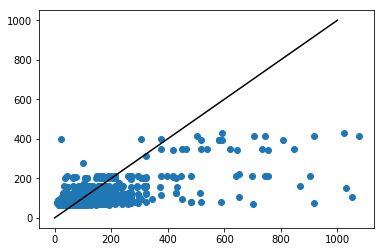

In [28]:
plt.figure(figsize=[14, 10])
plt.scatter(test_data['price'], predictions, c='r')
x=np.linspace(0,1000,100)
plt.plot(x,x,'k-')

In [30]:
rmse = tc.evaluation.rmse(test_data['price'], predictions)

In [23]:
tc.evaluation.rmse(train_data['price'], example_predictions)

69.48504425893441

In [25]:
df_rooms['price'].mean()

87.57494748902045

In [35]:
len(test_data[test_data['price'] > rmse]) / len(test_data['price'])

0.46199021207177815

In [36]:
len(test_data[predictions > rmse]) / len(test_data['price'])

0.7047308319738989